In [1]:
import sys
import cv2
import os
import skimage
from skimage import io
import numpy as np
import tensorflow
import keras
import keras, keras.layers as L
sys.path.append("..")

In [5]:
#Load images
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels 


images=[]
for filename in os.listdir("faces"):
    img = io.imread(os.path.join("faces",filename))
    images.append(img)
    
x_train=images    
#Preprocess
x_train = [cv2.resize(image, (512, 512)) for image in x_train]
x_train = np.array(x_train)
x_train = x_train.astype('float32') / 255.0 - 0.5
IMG_SHAPE=x_train[0].shape

In [6]:
IMG_SHAPE

(512, 512, 3)

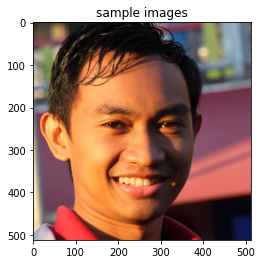

In [116]:
import matplotlib.pyplot as plt

def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))
    
IMG_SHAPE = x_train[0].shape
plt.title('sample images')

show_image(x_train[3])

In [8]:
def build_deep_autoencoder(img_shape):
    """PCA's deeper brother. See instructions above. Use `code_size` in layer definitions."""
    H,W,C = img_shape
    
    # encoder
    encoder = keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    
    ### YOUR CODE HERE: define encoder as per instructions above ###
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=512, kernel_size=(3, 3), activation='elu', padding='same'))




    # decoder
    decoder = keras.models.Sequential()

    ### YOUR CODE HERE: define decoder as per instructions above ###
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

In [9]:
encoder,decoder = build_deep_autoencoder(IMG_SHAPE)

In [10]:
#autoencoder training

inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inp,reconstruction)

encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       2

In [13]:
autoencoder.compile('nadam','mse')
autoencoder.fit(x=x_train,y=x_train,epochs=10000)

Epoch 1/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0650
Epoch 2/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0854
Epoch 3/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0645
Epoch 4/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 5/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0394
Epoch 6/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0330
Epoch 7/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 8/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0369
Epoch 9/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 10/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0331
Epoch 11/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 12/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 13/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 103/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 104/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 105/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 106/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0654
Epoch 107/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0673
Epoch 108/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 109/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0915
Epoch 110/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 111/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0606
Epoch 112/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0477
Epoch 113/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 114/10000
1/1 [==========

KeyboardInterrupt: 

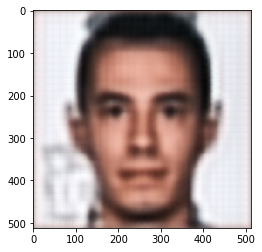

In [87]:
code1, code2 = encoder.predict(np.stack([x_train[5], x_train[9]]))
output_code = code1*(1-0.5) + code2*(0.5)
output_image = decoder.predict(output_code[None])[0]
show_image(output_image)

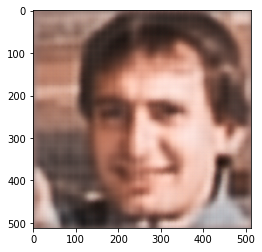

In [97]:
code1, code2 = encoder.predict(np.stack([x_train[6], x_train[12]]))
output_code = code1*(1-0.67) + code2*(0.67)
output_image = decoder.predict(output_code[None])[0]
show_image(output_image)

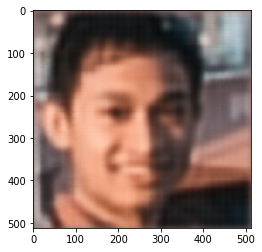

In [115]:
code1, code2 = encoder.predict(np.stack([x_train[11], x_train[3]]))
output_code = code1*(1-0.67) + code2*(0.67)
output_image = decoder.predict(output_code[None])[0]
show_image(output_image)